In [8]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# regex
import re

In [134]:
data = pd.read_csv("../../data/cricket.csv",encoding="latin1")
data.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


## Splitting Player and Span using regex
* We will use a regex to extract the player name, country, and the first/last year of professional play

In [135]:
#using a regex to extract the player name and country
NamCou = data.pop('Player').str.extract('(?P<name>^.*)\s\((?:Afr|Asia\/)?(?:ICC)?(?:\/)?(?P<country>[A-Z]+)(?:\/[A-Z]+)?\)',expand=True)
data = pd.merge(NamCou,data,left_index=True,right_index=True,suffixes=(None,None))
data.head()

,name,country,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar,INDIA,1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara,SL,2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting,AUS,1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya,SL,1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene,SL,1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [136]:
#using a regex to extract the years
StEn = data.pop('Span').str.extract('(?P<start>\d{4})-(?P<end>\d{4})',expand=True)
# data[['start','end']]=data.Span.str.split('-',expand=True)

data = pd.merge(data,StEn,left_index=True,right_index=True,suffixes=(None,None))
data.head()

,name,country,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,start,end
0,SR Tendulkar,INDIA,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,1989,2012
1,KC Sangakkara,SL,404,380,41,14234,169,41.98,18048,78.86,25,93,15,2000,2015
2,RT Ponting,AUS,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1995,2012
3,ST Jayasuriya,SL,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1989,2011
4,DPMD Jayawardene,SL,448,418,39,12650,144,33.37,16020,78.96,19,77,28,1998,2015


## converting start and end to datetime objects

In [137]:
data[['start','end']] = data[['start','end']].apply(pd.to_datetime,format='%Y')
data[['start','end']] = data[['start','end']].apply(lambda x: x.dt.year)
data.head()

,name,country,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,start,end
0,SR Tendulkar,INDIA,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,1989,2012
1,KC Sangakkara,SL,404,380,41,14234,169,41.98,18048,78.86,25,93,15,2000,2015
2,RT Ponting,AUS,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1995,2012
3,ST Jayasuriya,SL,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1989,2011
4,DPMD Jayawardene,SL,448,418,39,12650,144,33.37,16020,78.96,19,77,28,1998,2015


In [169]:
# renaming the columns for readability
data.rename(columns={"Mat":"Nof_matches",
               "Inns":"Nof_innings",
               "NO":"player_no",
               "Runs":"Nof_runs",
               "HS":"highest_score",
               "Ave":"average_score",
               "BF":"Nof_ballsfaced",
               "SR":"strike_rate",
               "100":"Nof_100s",
               "50":"Nof_50s",
               "0":"Nof_ducks"}
,inplace=True)

In [139]:
#creating an experience column
data['experience']= data['end']-data['start']

data.drop(columns=['start','end'],inplace=True)

In [140]:
#extracting numerical high scores
data.highest_score = data.highest_score.str.extract('(\d+)')
data.head()

#converting it to int
data.highest_score = pd.to_numeric(data.highest_score)
data.head()

,name,country,Nof_matches,Nof_innings,player_no,Nof_runs,highest_score,averge_score,Nof_ballsfaced,strike_rate,Nof_100s,Nof_50s,Nof_ducks,experience
0,SR Tendulkar,INDIA,463,452,41,18426,200,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara,SL,404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting,AUS,375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya,SL,445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene,SL,448,418,39,12650,144,33.37,16020,78.96,19,77,28,17


In [141]:
# metadata
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            79 non-null     object 
 1   country         79 non-null     object 
 2   Nof_matches     79 non-null     int64  
 3   Nof_innings     79 non-null     int64  
 4   player_no       79 non-null     int64  
 5   Nof_runs        79 non-null     int64  
 6   highest_score   79 non-null     int64  
 7   averge_score    79 non-null     float64
 8   Nof_ballsfaced  79 non-null     int64  
 9   strike_rate     79 non-null     float64
 10  Nof_100s        79 non-null     int64  
 11  Nof_50s         79 non-null     int64  
 12  Nof_ducks       79 non-null     int64  
 13  experience      79 non-null     int32  
dtypes: float64(2), int32(1), int64(9), object(2)
memory usage: 8.5+ KB


In [142]:
#names are meaningless here
players= data.pop('name')
country=data.pop('country')

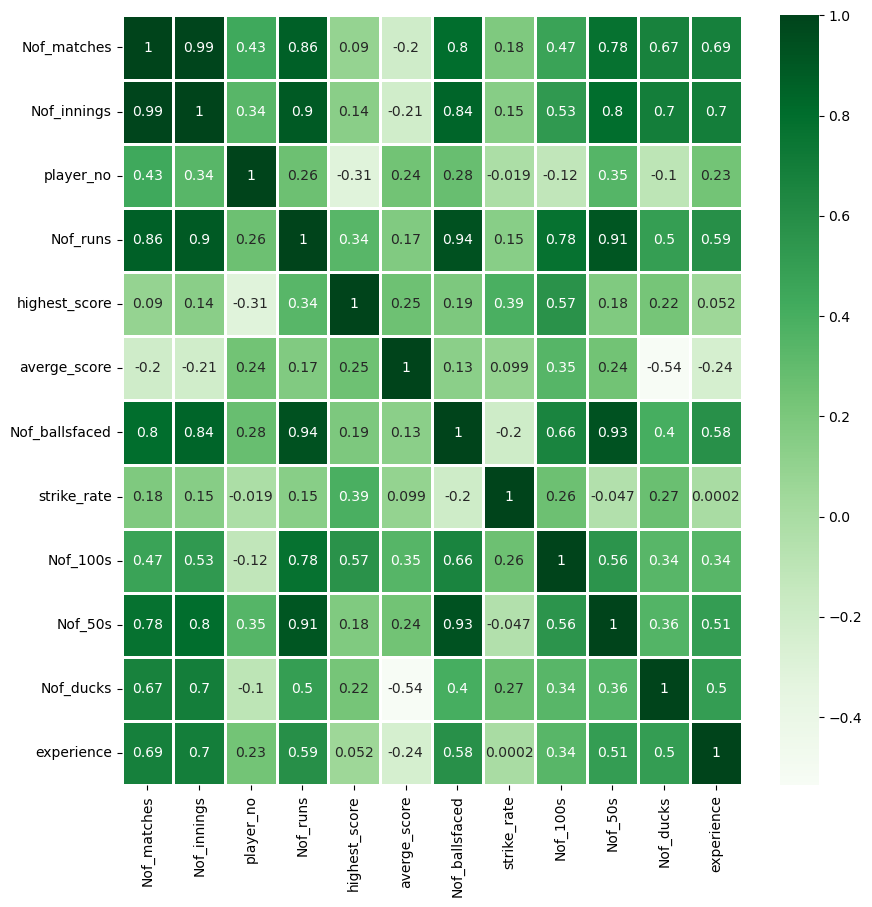

In [143]:
# mapping correlation with a heat map
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(numeric_only=True),annot=True,cmap='Greens',linewidth=2)
plt.show()

In [144]:
data.head()

,Nof_matches,Nof_innings,player_no,Nof_runs,highest_score,averge_score,Nof_ballsfaced,strike_rate,Nof_100s,Nof_50s,Nof_ducks,experience
0,463,452,41,18426,200,44.83,21367,86.23,49,96,20,23
1,404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,448,418,39,12650,144,33.37,16020,78.96,19,77,28,17


In [153]:
# standardized preprocessing
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Scdf = scaler.fit_transform(data)
Scdf[:5,:]

array([[ 2.95528204,  3.1693334 ,  0.76496275,  4.26232808,  1.6324432 ,
         1.07229395,  3.68121424,  0.70315153,  4.65672622,  3.0500572 ,
         1.14583653,  2.81278702],
       [ 2.15517925,  2.13891509,  0.76496275,  2.60911662,  0.6352236 ,
         0.58772461,  2.63538469, -0.0441395 ,  1.67188751,  2.86541772,
         0.29667062,  0.38093832],
       [ 1.76190839,  1.92424461,  0.6253968 ,  2.40009894,  0.47438172,
         0.59622582,  2.31965067,  0.1109969 ,  2.29372891,  2.1884063 ,
         1.14583653,  0.9889005 ],
       [ 2.71118288,  2.89741746, -0.8400457 ,  2.29204075,  1.27859108,
        -1.04790945,  1.58829472,  1.20709133,  2.04499235,  1.3267554 ,
         3.52350108,  2.50880593],
       [ 2.75186607,  2.68274698,  0.6253968 ,  1.98442984, -0.16898576,
        -0.87618487,  1.99635416, -0.03399986,  0.92567783,  1.88067384,
         2.50450199,  0.9889005 ]])

In [158]:
# scaler.inverse_transform(Scdf)

In [160]:
# using the z-score to standardize a series of values
a = pd.Series([463,404,375,445,448])
a.head()
standardized_a = (a-a.mean())/a.std()
standardized_a

0    0.989556
1   -0.632217
2   -1.429359
3    0.494778
4    0.577241
dtype: float64

## The K-Means clustering

In [209]:
# importing the relevant libraries
from sklearn.cluster import KMeans

cluster = KMeans(n_clusters=4)
cluster.fit(Scdf)

KMeans(n_clusters=4)

In [215]:
#The cluster labels for each point
print(cluster.labels_)

#passing the labels to the main dataframe
data['cluster_label'],data['player_name'] = cluster.labels_,players
data.head()

[3 3 3 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1]


,Nof_matches,Nof_innings,player_no,Nof_runs,highest_score,averge_score,Nof_ballsfaced,strike_rate,Nof_100s,Nof_50s,Nof_ducks,experience,cluster_label,player_name
0,463,452,41,18426,200,44.83,21367,86.23,49,96,20,23,3,SR Tendulkar
1,404,380,41,14234,169,41.98,18048,78.86,25,93,15,15,3,KC Sangakkara
2,375,365,39,13704,164,42.03,17046,80.39,30,82,20,17,3,RT Ponting
3,445,433,18,13430,189,32.36,14725,91.20,28,68,34,22,2,ST Jayasuriya
4,448,418,39,12650,144,33.37,16020,78.96,19,77,28,17,2,DPMD Jayawardene


In [171]:
data[data.cluster_label==0].sort_values(by=['Nof_innings','averge_score','strike_rate'],ascending=[True,False,False])

,Nof_matches,Nof_innings,player_no,Nof_runs,highest_score,averge_score,Nof_ballsfaced,strike_rate,Nof_100s,Nof_50s,Nof_ducks,experience,cluster_label,player_name
58,227,206,43,5761,113,35.34,7517,76.63,7,29,7,16,0,CL Hooper
32,233,218,41,7381,119,41.70,11014,67.01,8,50,8,21,0,Javed Miandad
41,252,228,36,6765,143,35.23,8278,81.72,9,39,13,18,0,Shoaib Malik
78,265,228,57,5080,112,29.70,6252,81.25,3,23,14,15,0,Abdul Razzaq
45,273,252,39,6524,127,30.62,9134,71.42,3,39,11,15,0,AR Border
31,269,255,47,7456,131,35.84,9571,77.90,4,49,18,17,0,A Ranatunga
35,283,256,38,7170,102,32.88,9383,76.41,5,47,19,17,0,Saleem Malik
30,325,288,58,7569,120,32.90,9971,75.91,3,45,15,16,0,SR Waugh


In [172]:
data[data.cluster_label==1].sort_values(by=['Nof_innings','averge_score','strike_rate'],ascending=[True,False,False])

,Nof_matches,Nof_innings,player_no,Nof_runs,highest_score,averge_score,Nof_ballsfaced,strike_rate,Nof_100s,Nof_50s,Nof_ducks,experience,cluster_label,player_name
23,244,236,20,8500,173,39.35,11053,76.90,18,50,16,14,1,ME Waugh
21,238,237,28,8648,152,41.37,13707,63.09,17,57,13,16,1,DL Haynes
19,268,251,40,8778,150,41.60,12408,70.74,11,59,6,17,1,S Chanderpaul
22,268,259,32,8529,132,37.57,12594,67.72,11,59,13,17,1,MS Atapattu
11,288,273,40,9720,141,41.71,12942,75.10,15,64,15,12,1,Mohammad Yousuf
20,304,278,40,8701,150,36.55,9924,87.67,14,52,18,17,1,Yuvraj Singh
9,299,289,32,10405,169,40.48,13086,79.51,19,63,16,17,1,BC Lara
16,308,296,30,9284,145,34.90,11443,81.13,11,64,17,19,1,PA de Silva
7,311,300,23,11363,183,41.02,15416,73.70,22,72,16,15,1,SC Ganguly
10,330,303,41,10290,161,39.27,11933,86.23,22,47,11,17,1,TM Dilshan


In [174]:
data[data.cluster_label==2].sort_values(by=['Nof_innings','averge_score','strike_rate'],ascending=[True,False,False])

,Nof_matches,Nof_innings,player_no,Nof_runs,highest_score,averge_score,Nof_ballsfaced,strike_rate,Nof_100s,Nof_50s,Nof_ducks,experience,cluster_label,player_name
75,162,149,31,5122,96,43.40,6945,73.75,0,42,6,13,2,Misbah-ul-Haq
64,185,157,44,5442,109,48.15,6243,87.16,3,39,3,8,2,MEK Hussey
77,198,161,33,5088,156,39.75,5504,92.44,6,30,15,11,2,A Symonds
56,181,169,33,5804,120,42.67,7663,75.74,5,38,8,13,2,RR Sarwan
57,185,174,25,5772,124,38.73,6513,88.62,11,34,12,11,2,EJG Morgan
62,188,175,31,5565,112,38.64,7277,76.47,2,39,8,8,2,WJ Cronje
46,190,176,29,6486,131,44.12,7906,82.03,17,37,9,11,2,LRPL Taylor
67,196,179,36,5359,119,37.47,7677,69.80,6,30,10,8,2,A Jadeja
76,197,181,37,5092,120,35.36,6614,76.98,5,26,7,10,2,PD Collingwood
68,208,182,51,5346,144,40.80,6877,77.73,5,37,10,14,2,DR Martyn


In [173]:
data[data.cluster_label==3].sort_values(by=['Nof_innings','averge_score','strike_rate'],ascending=[True,False,False])

,Nof_matches,Nof_innings,player_no,Nof_runs,highest_score,averge_score,Nof_ballsfaced,strike_rate,Nof_100s,Nof_50s,Nof_ducks,experience,cluster_label,player_name
69,167,166,15,5258,145,34.82,7060,74.47,8,32,13,11,3,BRM Taylor
60,173,171,4,5743,154,34.38,7333,78.31,9,38,16,10,3,Tamim Iqbal
52,181,177,16,5964,122,37.04,9157,65.13,5,37,6,11,3,DC Boon
72,187,177,26,5180,133,34.30,6794,76.24,10,28,10,16,3,MN Samuels
71,188,184,14,5185,131,30.50,7834,66.18,7,30,11,11,3,ADR Campbell
54,190,190,12,5876,140,33.01,7774,75.58,11,32,16,14,3,Mohammad Hafeez
48,204,193,14,6140,174,34.30,8183,75.03,14,34,15,12,3,WU Tharanga
37,197,194,10,6989,141,37.98,8648,80.81,10,47,8,11,3,GC Smith
55,198,197,15,5841,119,32.09,9226,63.31,9,31,15,12,3,Rameez Raja
73,213,198,23,5162,119,29.49,8521,60.57,4,35,15,13,3,RS Mahanama


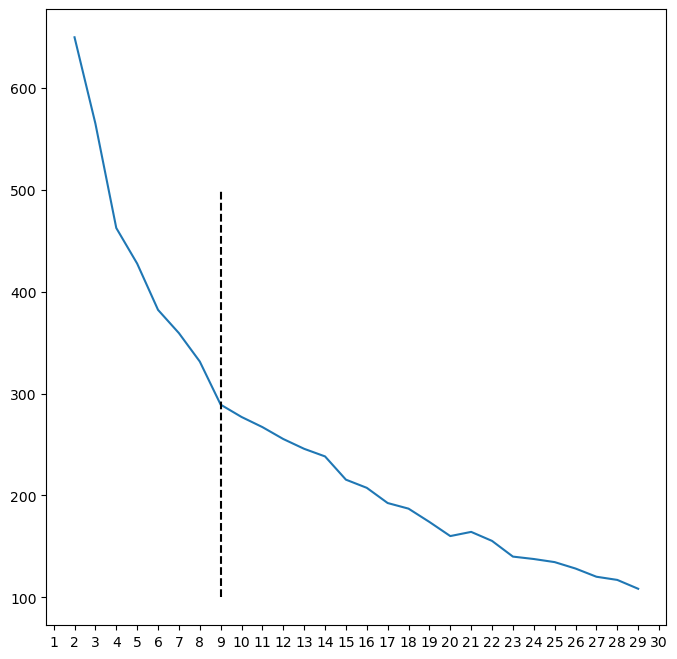

In [211]:
# the elbow curve (to find the best k-value)

import warnings
warnings.filterwarnings('ignore')
k = np.arange(2,30)
ssd = []

#carrying out k-means clustering
for n_clus in k:
    mod_cls = KMeans(n_clusters=n_clus,max_iter=500,random_state=0)
    mod_cls.fit(Scdf)
    ssd.append(mod_cls.inertia_)
plt.figure(figsize=(8,8))
plt.plot(k,ssd)
plt.xticks(np.arange(0,31))
plt.plot(np.repeat(9,5),np.linspace(100,500,5),ls='--',color='k')
plt.show()

# Therefore
by the elbow curve, we can see that 9 clusters is perhaps our best choice

<Axes: xlabel='not out', ylabel='average score'>

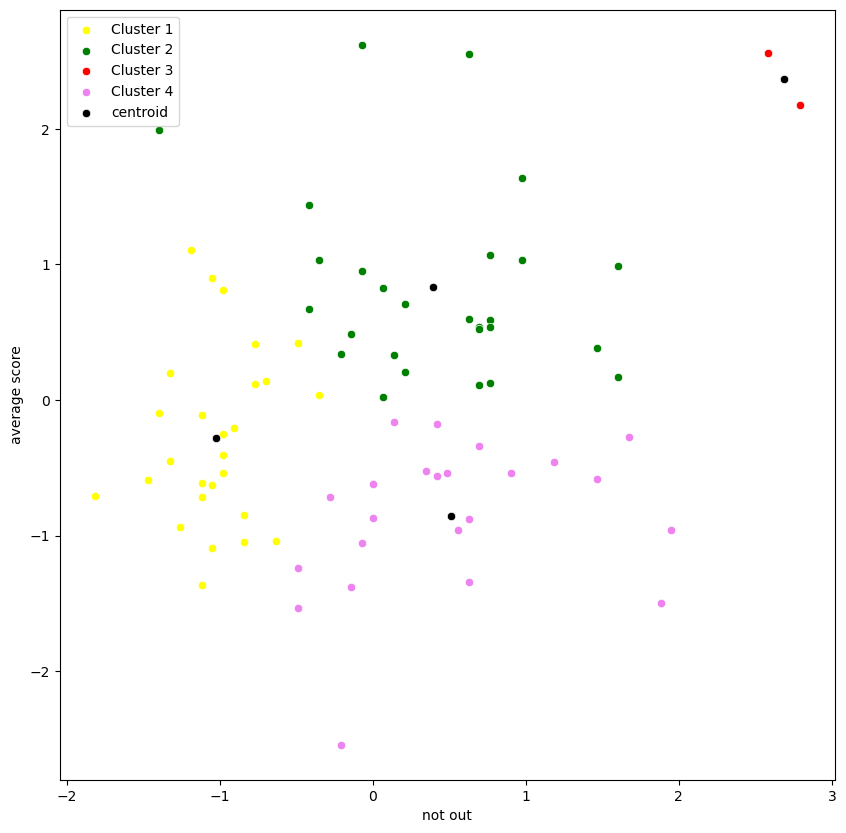

In [217]:
# a simple plot of a prediction test
ScdfD = pd.DataFrame(data={'x':Scdf[:,2],'y':Scdf[:,5]})
y_kmeans= cluster.fit_predict(ScdfD)

#appending it to the dataframe
ScdfD['label']=y_kmeans

plt.figure(figsize=(10,10))
sns.scatterplot(data=ScdfD[ScdfD['label']==0],x='x',y='y',color='yellow',label='Cluster 1')
sns.scatterplot(data=ScdfD[ScdfD['label']==1],x='x',y='y',color='green',label='Cluster 2')
sns.scatterplot(data=ScdfD[ScdfD['label']==2],x='x',y='y',color='red',label='Cluster 3')
sns.scatterplot(data=ScdfD[ScdfD['label']==3],x='x',y='y',color='violet',label='Cluster 4')

plt.xlabel('not out')
plt.ylabel('average score')

#plotting the centroids themselves
sns.scatterplot(x=cluster.cluster_centers_[:,0],y = cluster.cluster_centers_[:,1],color='k',label='centroid')